Essa aula começa com uma cópia da aula 3

In [1]:
import cv2
import matplotlib.pyplot as plt

from os import listdir, path, makedirs
from os.path import isfile, join

import shutil

## Verificando imagens

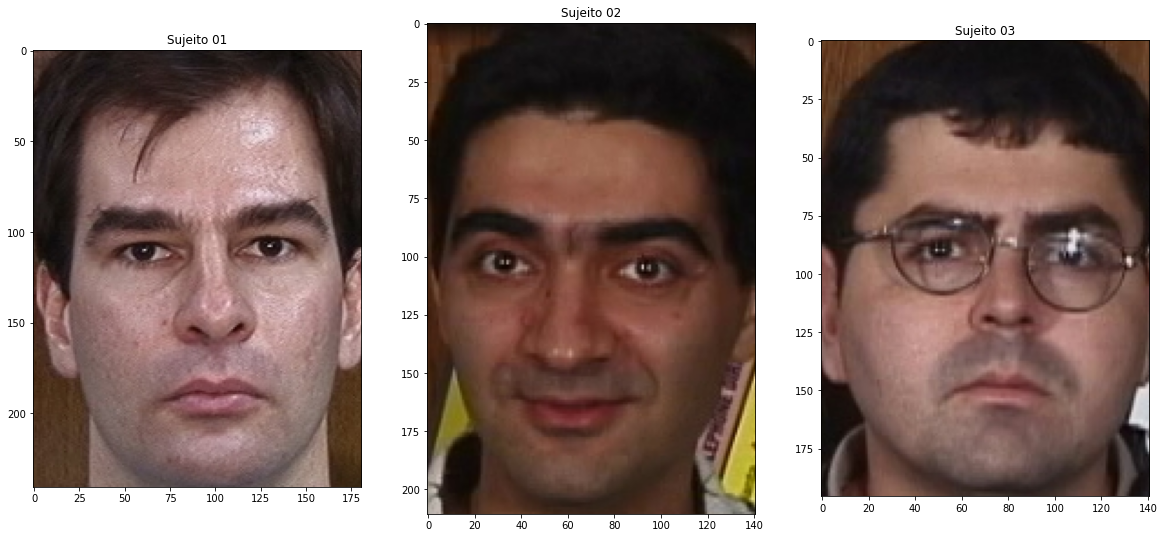

In [2]:
imagem_face_1 = cv2.imread("images/cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("images/cropped_faces/s02_01.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("images/cropped_faces/s03_01.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1)
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2)
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3)

plt.show()

In [3]:
imagem_face_1.shape

(241, 181, 3)

In [4]:
imagem_face_2.shape

(211, 141, 3)

In [5]:
imagem_face_3.shape

(196, 141, 3)

#### Agora vamos pegar as imagens da pasta cropped faces para separar em teste e treino

In [6]:
faces_caminho = "images/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [7]:
lista_arq_faces[0]

's36_10.jpg'

In [8]:
len(lista_arq_faces)

750

In [9]:
faces_path_treino = "images/treino/"
faces_path_teste = "images/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3] # s(23)_06.jpg
    numero = arq[4:6] # s23_(06).jpg
    
    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [10]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [11]:
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [12]:
lista_faces_treino[0]

's36_10.jpg'

In [13]:
lista_faces_teste[0]

's18_13.jpg'

In [14]:
dados_treinamento, sujeitos = [], []

In [15]:
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [16]:
len(dados_treinamento)

500

In [17]:
len(sujeitos)

500

In [18]:
dados_teste, sujeitos_teste = [], [] 

In [19]:
for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [20]:
len(dados_teste)

250

In [21]:
len(sujeitos_teste)

250

Text(0.5, 1.0, '1')

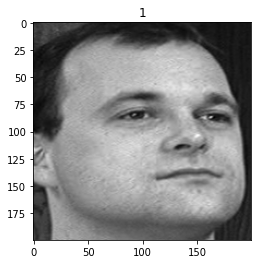

In [22]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

Text(0.5, 1.0, '18')

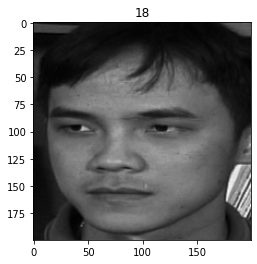

In [23]:
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeitos_teste[0])

# Aula 4 - Classificadores
4.1 - Classificador Eigenfaces

Primeiro vamos tranformas os arrays de sujeito em np 32 bits

In [24]:
import numpy as np

In [25]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [26]:
modelo_eigenfaces = cv2.face.EigenFaceRecognizer_create()

AttributeError: module 'cv2.cv2' has no attribute 'face'